In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx 
from shapely.geometry import Point, LineString
from shapely import distance
import numpy as np
from pyproj import Transformer
from shapely.geometry import LineString
import shapely.ops as sp_ops
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = os.getcwd()
parent = os.path.dirname(path)

In [3]:
df = gpd.read_file(parent+"\data\gis\osm\\roads.shp")  

In [4]:
df.head()

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
0,8656088,Park Rd,NaN,residential,0,0,NaN,"LINESTRING (90.42258 23.79758, 90.42238 23.798..."
1,8656089,Embassy Rd,NaN,residential,0,0,NaN,"LINESTRING (90.41891 23.79768, 90.42034 23.798..."
2,8656151,Dutabash Rd,NaN,residential,0,0,NaN,"LINESTRING (90.41857 23.79918, 90.41941 23.799..."
3,8656152,Road 1,NaN,residential,0,0,NaN,"LINESTRING (90.41926 23.80001, 90.42059 23.800..."
4,8656154,Road 2,NaN,residential,0,0,NaN,"LINESTRING (90.42049 23.80098, 90.42088 23.801..."


In [5]:
road_names = df[df["ref"].notnull()]["ref"].unique()
road_names_N = [road for road in road_names if road.startswith("N")]
# road_names_N1 = [road for road in road_names_N if "1" in road]

df_N = df[df["ref"].isin(road_names_N)]
df_N["ref"]=df_N["ref"].str.replace(" ","")
# df_N["ref"]=df_N["ref"].str.replace("H","")


<AxesSubplot:>

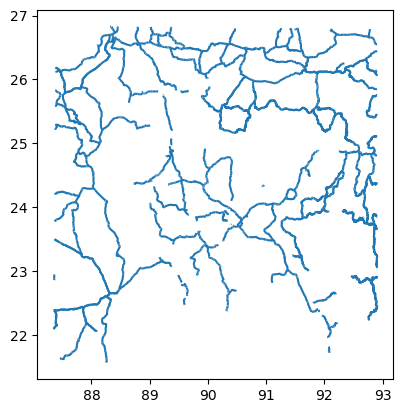

In [6]:
df_N.plot()

In [7]:
df["type"].unique()

array(['residential', 'trunk', 'primary', 'unclassified', 'service',
       'secondary', 'tertiary', 'track', 'primary_link', 'motorway',
       'footway', 'living_street', 'pedestrian', 'road', 'tertiary_link',
       'path', 'motorway_link', 'trunk_link', 'steps', 'secondary_link',
       'raceway', 'construction', 'bridleway', 'platform', 'cycleway',
       'rest_area', 'yes', 'minor', 'services', 'Lane', 'Embankment',
       'corridor', 'embankment'], dtype=object)

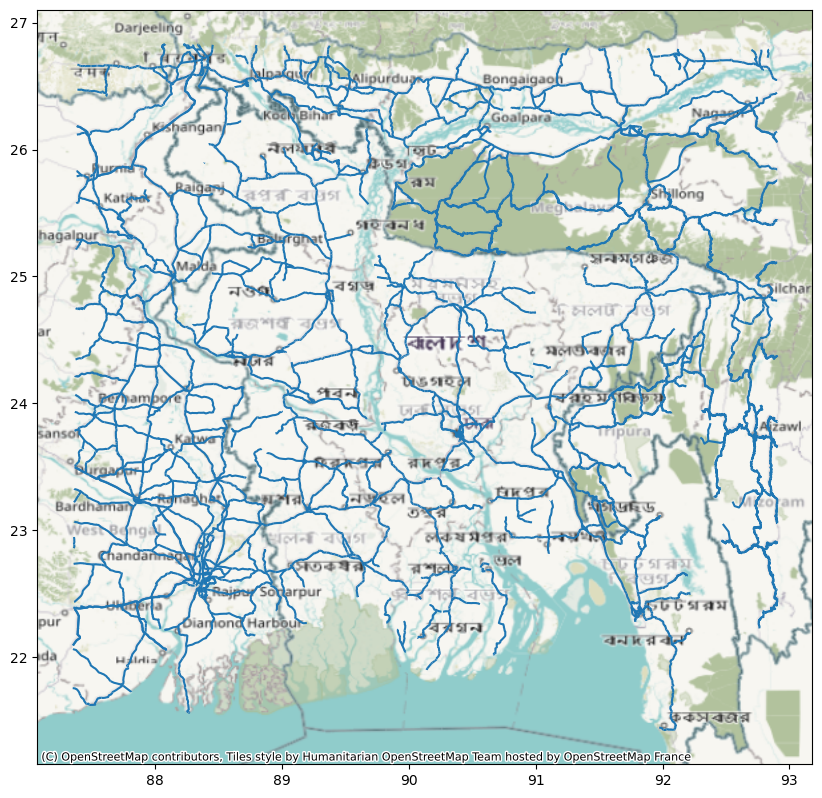

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
df_primary  =df[(df["type"]=="primary")|(df["type"]=="trunk")]
df_primary.plot(ax=ax)
cx.add_basemap(ax=ax,crs="epsg:4326")

In [9]:

df_normal_data = pd.read_csv(main_folder_path + "\\data\\_roads3.csv")

gdf_normal = gpd.GeoDataFrame(df_normal_data, geometry=gpd.points_from_xy(df_normal_data.lon, df_normal_data.lat), crs="EPSG:4326")
from shapely import buffer
lines = []
for name in ["N1","N2"]:
    gdf_temp = gdf_normal[gdf_normal["road"]==name]
    line = buffer(LineString(gdf_temp["geometry"]),0.1)
    lines.append(line)

NameError: name 'main_folder_path' is not defined

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
gpd.GeoSeries(lines,crs="4326").plot(ax=ax)
cx.add_basemap(ax=ax,crs="EPSG:4326")

In [ ]:

df_primary

In [ ]:
cross_index_N1=[]
cross_index_N2=[]
for index in df_primary.index:
    if lines[0].intersects(df_primary.loc[index,"geometry"]):
        cross_index_N1.append(index)
    if lines[1].intersects(df_primary.loc[index,"geometry"]):
        cross_index_N2.append(index)


intersecting_N1 =df_primary[df_primary.index.isin(cross_index_N1)]
intersecting_N2 =df_primary[df_primary.index.isin(cross_index_N2)]
intersecting_N1N2=pd.concat([intersecting_N1,intersecting_N2])
# intersections_N1 =gseries["N1"].intersection(intersecting_N1).drop("N1")
# intersections_N2 =gseries["N2"].intersection(intersecting_N2).drop("N2")
# 
# gdf_N1 =gdf[gdf["road"]=="N1"]
# gdf_N2 =gdf[gdf["road"]=="N2"]

In [ ]:
intersecting_N1N2= intersecting_N1N2[~intersecting_N1N2["ref"].str.replace(" ","").isin(["N1","N2"])]

In [ ]:
intersecting_N1N2

In [ ]:
df_primary["ref"]=df_primary["ref"].str.replace(" ","")

df_N1N2=df_primary[(df_primary["ref"]=="N1")|(df_primary["ref"]=="N2")]
df_N1N2.plot()

In [ ]:
Intersect_points = []
for line_N1N2 in df_N1N2["geometry"]:
    for intersect_line in intersecting_N1N2["geometry"]:
        if line_N1N2!=intersect_line:
            if line_N1N2.intersects(intersect_line):
               Intersect_points.append(line_N1N2.intersection(intersect_line))
            
    

In [ ]:

df_used_intersects = pd.read_csv(main_folder_path + "\\data\\intersections.csv")
gdf_used_intersects = gpd.GeoDataFrame(df_normal_data, geometry=gpd.points_from_xy(df_normal_data.lon, df_normal_data.lat), crs="EPSG:4326")

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
intersecting_N1N2.plot(ax=ax)
gdf_used_intersects.plot(ax=ax,color="red")
gpd.GeoSeries(Intersect_points,crs="4326").plot(ax=ax)


In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
# gpd.GeoSeries(lines,crs="4326").plot(ax=ax,alpha=0.3)
intersecting_N1.plot(ax=ax,color="red")
intersecting_N2.plot(ax=ax,color="yellow")
df_N1N2.plot(ax=ax,color="white")
cx.add_basemap(ax=ax,crs="EPSG:4326")

In [ ]:
df_trunk = df_N[((df_N["ref"]=="N1")|(df_N["ref"]=="N2"))]#(df_N["type"]=="trunk")&

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
df_trunk.plot(ax=ax)
cx.add_basemap(crs=4326,ax=ax)
plt.show()

In [ ]:
for 